<a href="https://colab.research.google.com/github/nithyasrip06/RipFinder-Unity/blob/main/Nithyasri_P_AI4ALL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**About our dataset:**
  
  161 pregnancies were followed from a 2019 study (by Imperial College London Hospitals) of which 64 pregnanies resulted in1st trimester miscarriage, 14 pregnancies in 2nd trimester miscarriage, and 83 pregnancies in full term pregnancies. From these women, a vaginal swab was collected during the first trimester, which was processed to extract all bacterial DNA, which was then sequenced and analyzed using BLAST to gauge the relative abundances of different bacteria.
If you're interested, you can read more here: https://obgyn.onlinelibrary.wiley.com/doi/pdf/10.1111/1471-0528.15972

Your data is all cleaned up and ready for you [here](https://drive.google.com/drive/folders/1BRSEBaqQ42DVHLMkZfP1ANg7AceutWP3?usp=sharing). However, our data will not always be clean and ready, so we are going to teach you about the importance of having high-quality data using another toy dataset.

In [ ]:
# package import block:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# **Data Cleaning**

Most data you recieve will not be always be consistently formatted and complete. It is important to ensure that the data used in your models is accurate, properly formatted and complete.



**Task**:

  You have two files in the "Data Cleaning" folder ([link](https://drive.google.com/drive/folders/1BRSEBaqQ42DVHLMkZfP1ANg7AceutWP3?usp=sharing)), and we want you to check whether they're "clean" (good quality) or not.

  These two files contain sequences of bacterial DNA from sewage in St. Louis: one has good-quality sequences, the other bad-quality sequences. Before trying to run them through BLASTn (online tool that can take DNA sequences and find which bacteria it came from), we have to check the quality of the files.

  
  The software we use to run the quality check is called "[FastQC](https://www.hadriengourle.com/tutorials/qc/)". After running FastQC on each fastq file (that contains your sequences), you can read a report about each of your files, that tells you about your data quality.

  Here is a sample report from a [good](https://www.hadriengourle.com/tutorials/data/fastqc/SRR957824_500K_R1_fastqc.html) quality sample, and a [bad](https://www.hadriengourle.com/tutorials/data/fastqc/SRR957824_500K_R2_fastqc.html) quality sample.

  Look at both of them, then answer these questions:


**Questions:**

    1. Did all files run smoothly?
    2. Which file is higher quality? Why?
    3. Why do you think the quality of the reads depends on the position in the DNA sequence? Why does the quality drop near the end of the sequences?

Now, you're ready to do part 2 of data cleanup: alignment!

You have all of your DNA sequence files, now you want to know which bacteria your sequences came from. For that, you use BLASTn (Basic Local Sequence Alignment Tool) that takes your DNA sequences, compares them with sequences from the genomes of thousands of organisms, and tells you which one your sequence most likely came from! Neat, huh?

Now, you have 4 fasta (sequence) files in your "Data Cleaning" folder. Run [BLASTn](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&BLAST_SPEC=GeoBlast&PAGE_TYPE=BlastSearch) on all of them, then answer the questions below.

To run BLAST, simply upload your fasta files and click "BLAST!"

**Questions:**

    1. Did all files run smoothly?
    2. What issues have you encountered?
    3. What should be done to with the files/patients whose files did not converge?

# **Understanding Your Dataset**

[Here](https://drive.google.com/drive/folders/1BRSEBaqQ42DVHLMkZfP1ANg7AceutWP3?usp=sharing) we've provided you with the dataset you'll be using for your project:

*   a set of all bacterial abundances from all 161 patients in csv format (each file's name is the patient's codename)
*   1 metadata csv file containing the codename for each patient and whether they had a successful pregnancy or a miscarriage in 1st / 2nd trimester.

You will find the corresponding files in the "Alignments" and "Metadata" folder both within the "Model Building" folder.

We suggest opening up some of the bacterial abundances csv's, and understanding what the data looks like, so that you can do your machine learning well!

Now, let's do some data visualization exercises to help you understand the data!


**Task:**

Let's start building our models!

We'll be building models to predict whether or not a pregnancy goes to term based on an individual's vaginal microbiome.

*To Do:*

1. Format your output
2. Choose your ML algorithms
  - Supervised:
    - Logistic Regression
    - Random Forest
    - Perceptron
    - K-Nearest Neighbors
  - Unsupervised:
    - K-Means Clustering
3. Train your models and experiment with different data splitting techniques
  - Traditional test-train split
  - K-fold cross validations
  - Stratified train-test split
4. Evaluate your models






EXERCISE: make a bar chart of the types of pregnancy (successful, 1st trimester miscarriage, 2nd trimester miscarriage) and how many patients had each. (hint: use the metadata .csv)

EXERCISE: make a chart of the relative abundance of the bacteria in 3 patient samples of your choice. You can have three separate bar charts (one for each patient). Or, you can make a pie chart for each patient.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

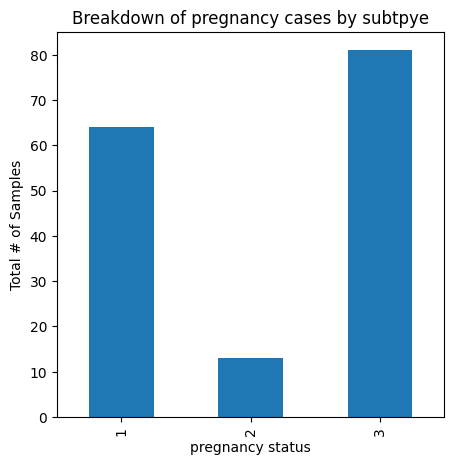

In [ ]:
# bar chart of metadata
# First we can plot cases by country
# pandas has a convenient function for this
metadata_file = data = pd.read_csv("/content/samples_and_status.csv")
metadata_file.columns=["Sample ID","status"]
count_by_cancer = metadata_file.groupby(['status']).size()
count_by_cancer.plot.bar(y="Sample ID",figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("pregnancy status")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of pregnancy cases by subtpye")
plt.show()

# 1: 1st sem miscarriage, 2: 2nd sem miscarriage, 3: successful pregnancy

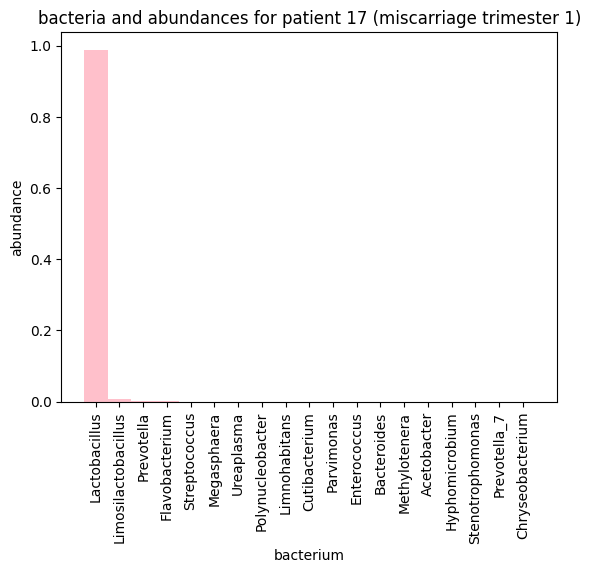

In [ ]:
# bar chart of patient info
patient_17 = pd.read_csv("/content/17.csv",index_col=0)
patient_17
bacterium = patient_17["bacterium"]
abundance = patient_17["abundance"]
plt.bar(bacterium, abundance, color ='pink',
        width = 1)
plt.xticks(rotation=90)

plt.xlabel("bacterium")
plt.ylabel("abundance")
plt.title("bacteria and abundances for patient 17 (miscarriage trimester 1)")
plt.show()

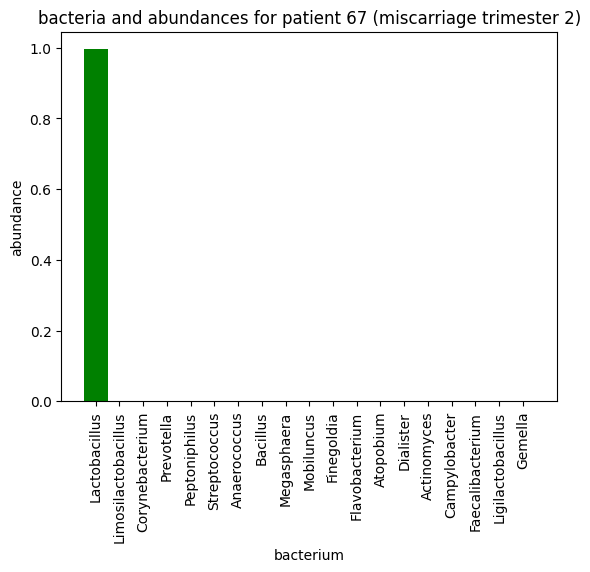

In [ ]:
patient_67 = pd.read_csv("/content/67.csv",index_col=0)
patient_67
bacterium = patient_67["bacterium"]
abundance = patient_67["abundance"]
plt.bar(bacterium, abundance, color ='green',
        width = 1)
plt.xticks(rotation=90)

plt.xlabel("bacterium")
plt.ylabel("abundance")
plt.title("bacteria and abundances for patient 67 (miscarriage trimester 2)")
plt.show()

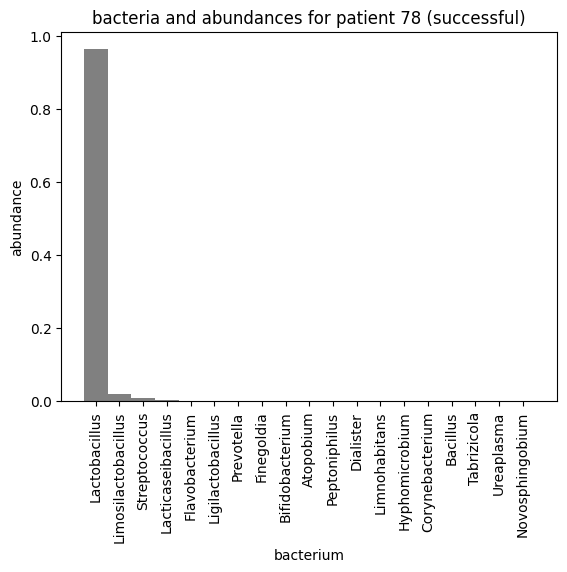

In [ ]:
patient_78 = pd.read_csv("/content/78.csv",index_col=0)
patient_78
bacterium = patient_78["bacterium"]
abundance = patient_78["abundance"]
plt.bar(bacterium, abundance, color ='grey',
        width = 1)
plt.xticks(rotation=90)

plt.xlabel("bacterium")
plt.ylabel("abundance")
plt.title("bacteria and abundances for patient 78 (successful)")
plt.show()

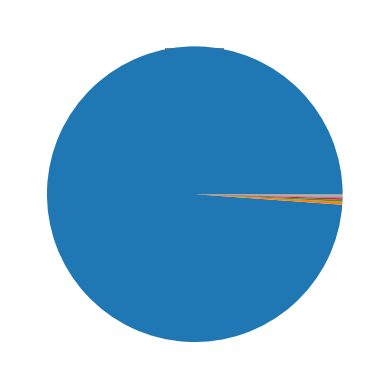

In [ ]:
# pie chart of patient info
# it's correct that almost all the bacteria is actually lactobacillus
patient_52 = pd.read_csv("/content/52.csv",index_col=0)
patient_52
bacterium = patient_52["bacterium"]
abundance = patient_52["abundance"]
plt.bar(bacterium, abundance, color ='grey', width = 0.4)

plt.pie(abundance)
plt.show()

# Model Building


Now that you understand your data better, let's build our models!

We'll be building models to predict whether or not a pregnancy goes to term based on an individual's vaginal microbiome.


## *To Do:*

1. Format your output
  - you're doing binary classification (**successful pregnancy**, vs **miscarriage**)
2. Choose your ML algorithms
  - Supervised: (choose two of these)
    - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
    - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier) / [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)
    - [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
    - [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - Unsupervised:
    - [K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
3. Experiment with different data splitting techniques
  - Traditional [test-train split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
  - [K-fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)
  - Stratified train-test split (we learned this on Thursday)
3. Train your model
4. Evaluate your models
  - we want to see the "accuracy" value for all of your combinations, and if you want to show us a confusion matrix too, that would be cool with us!



To help you, here we copied a block of code that we have done together on Thursday that explains the steps of how we implement a machine learning algorithm:



In [ ]:
X = pd.read_csv("/content/fixed_data.csv")

# Carry out PCA on X
miscarriage = pd.read_csv("/content/samples_and_status.csv")


add = miscarriage["Miscarriage (1=1st trimester, 2=2nd trimester, 3=success)"]


X.insert(1, "Status", add)

pca = PCA(n_components=2)
# TODO: Run PCA on X to get the first 2 principal components
# use .fit_transform()
X_pca = pca.fit_transform(X)
X

ValueError: ignored

In [ ]:
# import your classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# do your train-test split (here you can do the stratified, normal or k-fold cross-validation)

data = pd.read_csv("/content/Copy of fixed_data - fixed_data.csv",index_col=0)

X_train, X_test, y_train, y_test = train_test_split(data,phenos,
                                                    stratify=phenos,
                                                    test_size=0.3,
                                                    random_state=35,)

# here you build your classifier
classifier = DecisionTreeClassifier(max_depth=5,random_state=35)
# train your classifier
classifier = classifier.fit(X_train, y_train)
# test your classifier and output an accuracy score
y_predict = classifier.predict(X_test)
classifier.score(X_test, y_test)

NameError: ignored

Again, remember: if you're ever confused, refer to the DOCUMENTATION! In the list above, click on each concept to go to its documentation page in Scikit Learn :)

# Do your Machine Learning here!


Here is an import block, run this before you start doing your machine learning:

In [ ]:
# code import block
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# we're going to import Random Forest classifier:
from sklearn.ensemble import RandomForestClassifier

# we're going to import logistic regression:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# we're going to import perceptron:
from sklearn.linear_model import Perceptron

# we're going to import k-nearest neighbors classifier:
from sklearn.neighbors import KNeighborsClassifier

# we're going to import k-means clustering:
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# **Decision Tree**

Now, start working! and don't forget to write comments to tell us what you're trying to do with the code.

In [ ]:
# your code here!

info = pd.read_csv("/content/binaryclass.csv",index_col=0)
bact = pd.read_csv("/content/fixed_data.csv",index_col=0)
info = info.dropna(axis=1) # we got rid of the NA columns

bact.index.names = ['Sample ID'] # renamed the sample ID column to be consistant in both datasets

ID = info.index.astype(str) # converted all the sample ids into strings so that they are useable
ID_2 = bact.index.astype(str)


In [ ]:
# NON STRATIFIED VERSION !!!!!
X_train, X_test, y_train, y_test = train_test_split(bact,info,test_size=0.3,random_state=35,)
#here we split up the data into a training set and a test set (70-30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# printed the different sets just so we know what itll look like

(110, 228)
(48, 228)
(110, 1)
(48, 1)


In [ ]:
# Initialize the classifier with a max_depth of 5 -- defining our model (?)
classifier = DecisionTreeClassifier(max_depth=3,random_state=35)  # max features is 8


# Fit the classifier to the training set
# This is the training process!! sklearn makes it super easy for us
classifier = classifier.fit(X_train, y_train)

In [ ]:
#actually running the model
dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False)
graph = graphviz.Source(dot_data)
graph # x[number] signals which column it is looking at and how much the value of the abundance of the baterium is
# the first value shows that 56 samples and 54 samples are in the two seperate groups

AttributeError: ignored

In [ ]:
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test) # function used to make predictions from a model, give it our testing data

print(y_predict)
# outputs are labels for our testing data

accuracy = classifier.score(X_test, y_test) # score runs predict as well
print(accuracy)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 1 0 0]
0.5416666666666666


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(bact,info,stratify=info,test_size=0.3,random_state=35,)
#here we split up the data into a training set and a test set (70-30)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)
# printed the different sets just so we know what itll look like

(110, 228)
(48, 228)
(110, 1)
(48, 1)


In [ ]:
# Initialize the classifier with a max_depth of 5 -- defining our model (?)
classifier2 = DecisionTreeClassifier(max_depth=3,random_state=35)  # max features is 5


# Fit the classifier to the training set
# This is the training process!! sklearn makes it super easy for us
classifier2 = classifier2.fit(X_train2, y_train2)

In [ ]:
#actually running the model
dot_data2 = tree.export_graphviz(classifier2, out_file=None, impurity=False)
graph2 = graphviz.Source(dot_data2)
graph2 # x[number] signals which column it is looking at and how much the value of the abundance of the baterium is
# the first value shows that 56 samples and 54 samples are in the two seperate groups

AttributeError: ignored

In [ ]:
# Create a list of predicted classes for each of the examples in the test set
y_predict2 = classifier2.predict(X_test2) # function used to make predictions from a model, give it our testing data

print(y_predict2)
# outputs are labels for our testing data

accuracy2 = classifier2.score(X_test2, y_test2) # score runs predict as well
print(accuracy2)

[0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0]
0.4166666666666667


# **Random Forest**

Accuracy: 0.4583333333333333


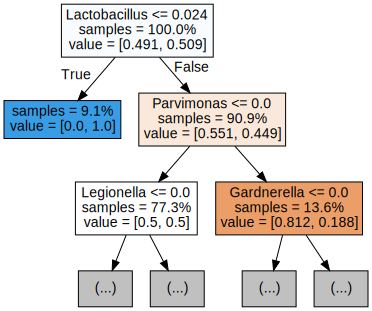

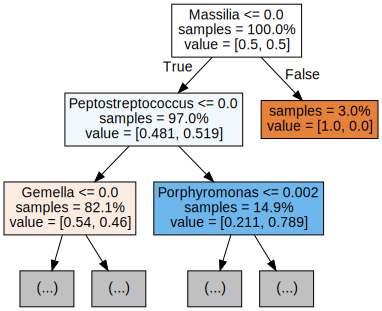

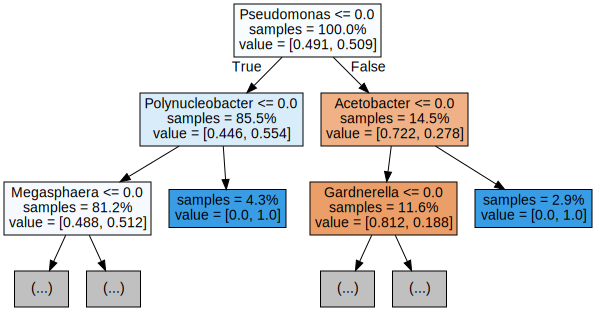

In [ ]:
# non stratified version

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Accuracy: 0.375


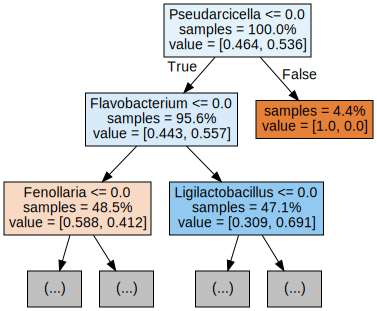

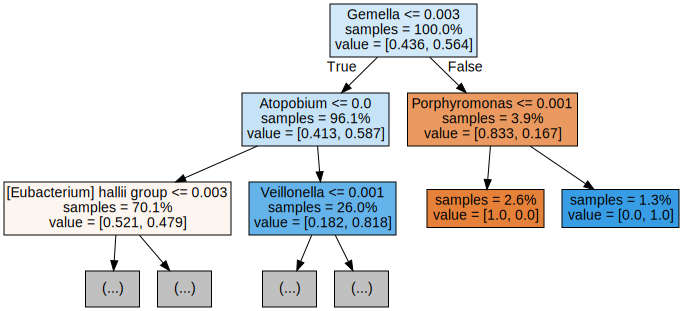

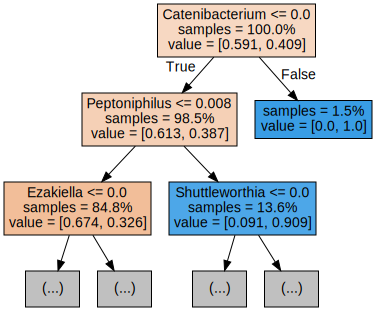

In [ ]:
# stratified version

rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# **Logistic Regression**

In [ ]:
# NON STRATIFIED DATA
# create the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train,y_train)
# make predictions
y_predict_lr = lr.predict(X_test)
# calculate accuracy
accuracy = metrics.accuracy_score(np.array(y_test), y_predict_lr)
accuracy

0.5

In [ ]:
# STRATIFIED DATA
# create the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train2,y_train2)
# make predictions
y_predict_lr = lr.predict(X_test2)
# calculate accuracy
accuracy = metrics.accuracy_score(np.array(y_test2), y_predict_lr)
accuracy

0.4375

# **Perceptron**

In [ ]:
# BEST SO FAR
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X_train, y_train = load_digits(return_X_y=True)
Perceptron()
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_test, y_test)

clf.score(X_test, y_test)

NameError: ignored

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X_train2, y_train2 = load_digits(return_X_y=True)
Perceptron()
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_test2, y_test2)

clf.score(X_test2, y_test2)



0.5625

# **K-Nearest Neighbors**

In [ ]:
#non stratified version

k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))

print('Accuracy:',scores_list)

Accuracy: [0.59375, 0.65625, 0.53125]


In [ ]:
#stratified version

k_range = range(1,4)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2,y_train2)
    y_pred_knn = knn.predict(X_test2)
    scores[k] = metrics.accuracy_score(y_test2,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test2,y_pred_knn))

print('Accuracy:',scores_list)

Accuracy: [0.53125, 0.5625, 0.375]


# **K-Means Clustering**

In [ ]:
X = pd.read_csv("/content/help.csv")

# Carry out PCA on X
miscarriage = pd.read_csv("/content/binaryclass.csv")


add = miscarriage["Miscarriage (1=miscarriage, 0=success)"]


# X.insert(1, "Status", add)

pca = PCA(n_components=2)
# TODO: Run PCA on X to get the first 2 principal components
# use .fit_transform()
X_pca = pca.fit_transform(X)



pca = PCA(n_components=2)
# TODO: Run PCA on X to get the first 2 principal components
# use .fit_transform()


print(X_pca) #see the makeup of the data after going through pca #this shows something but i have no idea what it could be
# Create our KMeans classifier
# n_clusters specifies what value of k to use (how many clusters)
kmeans_clf = KMeans(n_clusters=2)

y_pred = kmeans_clf.fit_predict(X_pca)
# Make the plot a relatively small size
plt.figure(figsize=(8, 8))


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
# Add labels and a title
plt.xlabel('x')
plt.ylabel('y')

silhouette_avg = silhouette_score(X_pca, y_pred)

print(silhouette_avg)

plt.title('PCA ')

FileNotFoundError: ignored

# **Reflect**

1. Comment in a few sentences on how low-quality vs high-quality (cleaned-up data) affects the alignment of the samples to the bacterial genomes (discovering what bacteria we have in the samples)

2. What are the inputs and outputs of each of your machine learning models?

3. What is the difference between the inputs of the supervised and unsupervised learning algorithms?

4. Provide a table that summarizes the training and testing accuracy for all combinations of train-test split methods and ML algorithms used

5. How did each of the train-test split methods affect the algorithms’ accuracy? Which method do you think is more reliable, and why?

6. What do you think of the dataset’s structure? How could the dataset be improved for future machine learning applications?

7. How generalizable is your final model?

8. What do you think about this study’s design? Do you think that it reflects the diversity of people who can get pregnant? Do you think the sample size is enough?

9. Think about how a study can be expanded to study pregnancy outcomes for different ethnic groups, knowing that this study and many others about microbiomes and pregnancy outcomes are focusing on white women. Why do you think this has been historically the case, and how can we challenge this?


# **Extra Exploration**

Try the above experimentation with a 3-class ouput!(successful pregnancy, 1st trimester miscarriage, 2nd trimester mistarrage)

- Comment on whether binary classification vs three-category classification algorithms performed better, and why you think so.